In [8]:
import json
arg = open('/home/npande/jax-dag-gflownet/output/arguments.json')

In [9]:
data = json.load(arg)
data

{'num_envs': 8,
 'scorer_kwargs': {},
 'prior': 'uniform',
 'prior_kwargs': {},
 'lr': 1e-05,
 'delta': 1.0,
 'batch_size': 256,
 'num_iterations': 100000,
 'replay_capacity': 100000,
 'prefill': 1000,
 'min_exploration': 0.1,
 'update_epsilon_every': 10,
 'num_samples_posterior': 1000,
 'update_target_every': 1000,
 'seed': 0,
 'num_workers': 4,
 'mp_context': 'spawn',
 'output_folder': 'output',
 'graph': 'erdos_renyi_lingauss',
 'num_variables': 5,
 'num_edges': 5,
 'num_samples': 100}

In [11]:
arg = open('../output/results.json')

In [12]:
type(arg)

_io.TextIOWrapper

In [13]:
print(arg)

<_io.TextIOWrapper name='../output/results.json' mode='r' encoding='UTF-8'>


In [14]:
out = json.load(arg)
out

{'expected_shd': 6.297,
 'expected_edges': 8.875,
 'fpr': [0.0,
  0.0,
  0.10526315789473684,
  0.10526315789473684,
  0.21052631578947367,
  0.21052631578947367,
  0.5789473684210527,
  0.5789473684210527,
  0.7368421052631579,
  1.0],
 'tpr': [0.0,
  0.16666666666666666,
  0.16666666666666666,
  0.3333333333333333,
  0.6666666666666666,
  0.8333333333333334,
  0.8333333333333334,
  1.0,
  1.0,
  1.0],
 'roc_auc': 0.7982456140350878,
 'precision': [0.24,
  0.3,
  0.3157894736842105,
  0.3333333333333333,
  0.35294117647058826,
  0.3125,
  0.3333333333333333,
  0.35714285714285715,
  0.38461538461538464,
  0.4166666666666667,
  0.45454545454545453,
  0.5,
  0.5555555555555556,
  0.5,
  0.5,
  0.5,
  0.3333333333333333,
  0.5,
  1.0,
  1.0],
 'recall': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.6666666666666666,
  0.5,

In [1]:
import pandas as pd
data = pd.read_csv('../output/data.csv')
data.head()

,Unnamed: 0,A,B,C,D,E
0,0,0.225985,0.149343,0.015548,-0.274168,0.239950
1,1,0.203122,-0.125907,0.094674,-0.106335,-0.064746
2,2,0.145770,0.151392,0.052544,-0.027942,0.161065
3,3,0.010960,0.134588,0.162603,0.100853,0.142636
4,4,0.210624,0.078131,0.004933,-0.009496,0.099529


In [2]:
data.shape

(100, 6)

In [19]:
import numpy as np
data = np.load('../output/posterior.npy')
data.shape

(1000, 5, 5)

In [4]:
import pickle
obj = pickle.load(open("../output/graph.pkl",'rb'))
type(obj)

/home/npande/miniconda3/envs/jax-dag-gflownet/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pgmpy.models.LinearGaussianBayesianNetwork.LinearGaussianBayesianNetwork

In [7]:
import pylab as plt

ModuleNotFoundError: No module named 'requests'

In [1]:
import pandas as pd
df = pd.read_csv('../data/month_df.csv')
df.head()

,pftCrop 6,pftShrubBD 8,ign 15,fPAR 17,tmx 30,precip 33
0,0.000370,0.014883,0.0,0.403727,13.0,82.959999
1,0.000000,0.052926,0.0,0.690684,12.6,70.370003
2,0.000000,0.000000,0.0,0.673421,13.0,64.400002
3,0.000000,0.035595,0.0,0.371436,12.2,61.720001
4,0.000617,0.056320,0.0,0.418094,12.6,60.080002


In [2]:
df.columns

Index(['pftCrop 6', 'pftShrubBD 8', 'ign 15', 'fPAR 17', 'tmx 30',
       'precip 33'],
      dtype='object')

In [14]:
df = df.drop(df.columns[0], axis=1)
df.head()

,pftCrop 6,pftShrubBD 8,ign 15,fPAR 17,tmx 30,precip 33
0,0.000370,0.014883,0.0,0.403727,13.0,82.959999
1,0.000000,0.052926,0.0,0.690684,12.6,70.370003
2,0.000000,0.000000,0.0,0.673421,13.0,64.400002
3,0.000000,0.035595,0.0,0.371436,12.2,61.720001
4,0.000617,0.056320,0.0,0.418094,12.6,60.080002


In [16]:
df.to_csv('../data/month_df.csv', index=False)

In [17]:
df.shape

(244243, 6)

In [18]:
df.columns

Index(['pftCrop 6', 'pftShrubBD 8', 'ign 15', 'fPAR 17', 'tmx 30',
       'precip 33'],
      dtype='object')

In [ ]:
from dag_gflownet.utils.gflownet import posterior_estimate
from numpy.random import default_rng
import jax
from dag_gflownet.gflownet import DAGGFlowNet
from dag_gflownet.env import GFlowNetDAGEnv
from dag_gflownet.utils.factories import get_scorer

args = {"num_envs": 8, "scorer_kwargs": {}, "prior": "uniform", "prior_kwargs": {}, "lr": 1e-05, "delta": 1.0, "batch_size": 256, "num_iterations": 100000, "replay_capacity": 100000, "prefill": 1000, "min_exploration": 0.1, "update_epsilon_every": 10, "num_samples_posterior": 100, "update_target_every": 1000, "seed": 0, "num_workers": 4, "mp_context": "spawn", "output_folder": "output", "graph": "asia"}

rng = default_rng(0)
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
scorer, data, graph = get_scorer(args, rng=rng)

gflownet = DAGGFlowNet(
    delta=1,
    update_target_every=1000
)
env = GFlowNetDAGEnv(
    num_envs=8,
    scorer=scorer,
    num_workers=args.num_workers,
    context=args.mp_context
)

posterior, _ = posterior_estimate(
    gflownet,
    model,
    env,
    key,
    num_samples=1000,
    desc='Sampling from posterior'
)

In [6]:
import pickle
graph = pickle.load(open("../output/graph.pkl",'rb'))
type(graph)

/home/npande/miniconda3/envs/jax-dag-gflownet/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pgmpy.base.DAG.DAG

In [8]:
import networkx as nx
dir(graph)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_get_ancestors_of',
 '_node',
 '_pred',
 '_succ',
 'active_trail_nodes',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'do',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_ancestral_graph',
 'get_children',
 'get_edge_data',
 'get_immoralities',
 'get_independencies',
 'get_leaves',
 'get_markov_blanket',
 'get_parents',
 'get_random',
 'get_roots',
 'graph',
 'graph_

AttributeError: 'dict' object has no attribute 'is_directed'

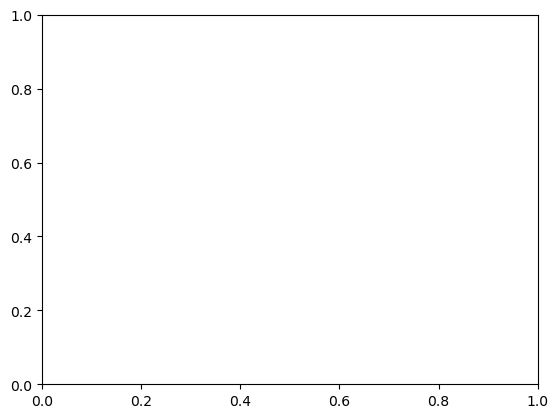

In [11]:
options = {
    'node_color': 'blue',
    'node_size': 2000,
    'width': 0.8,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}
nx.draw_networkx(graph.graph, **options)

In [12]:
# Convert to a networkx DiGraph
dg = nx.drawing.nx_pydot.to_pydot(graph)

# Draw the graph
nx.draw(dg)

ModuleNotFoundError: No module named 'pydot'

In [13]:
type(graph.graph)

dict

In [14]:
graph.graph

{}

In [15]:
import networkx as nx
from pgmpy.base import DAG

# Create the DAG
g = DAG()

# Add nodes and edges
g.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])

# Convert to a networkx DiGraph
dg = nx.drawing.nx_pydot.to_pydot(g)

# Draw the graph
nx.draw(dg)

ModuleNotFoundError: No module named 'pydot'

In [16]:
graph_new = graph.to_networkx()
type(graph_new)

AttributeError: 'DAG' object has no attribute 'to_networkx'

In [39]:
import networkx as nx
import numpy as np
posterior = np.load('../output/posterior.npy')
posterior.shape

(100, 6, 6)

In [40]:
posterior[0]

array([[0, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0]])

In [22]:
avg = np.sum(posterior, axis = 0)/100
avg.shape

(6, 6)

In [23]:
avg

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0.]])

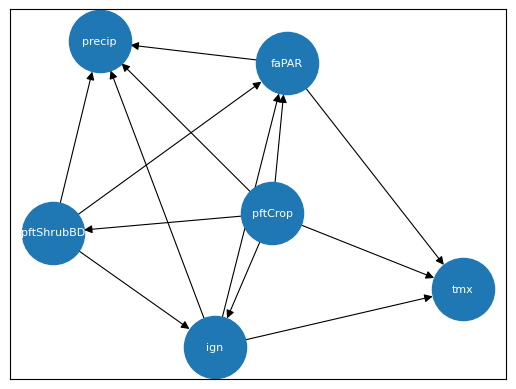

In [32]:
graph = nx.from_numpy_array(avg)

mapping = {
    0: 'pftCrop',
    1: 'pftShrubBD',
    2: 'ign',
    3: 'faPAR',
    4: 'tmx',
    5: 'precip'
}

graph = nx.relabel_nodes(graph, mapping)

options = {
    'node_size': 2000,
    'width': 0.8,
    'arrowstyle': '-|>',
    'arrowsize': 12,
    'font_color':'white',
    'font_size': 8
}

nx.draw_networkx(graph, arrows=True, **options)

In [33]:

import pickle
graph = pickle.load(open("../output/graph.pkl",'rb'))
graph.plot()

AttributeError: 'DAG' object has no attribute 'plot'

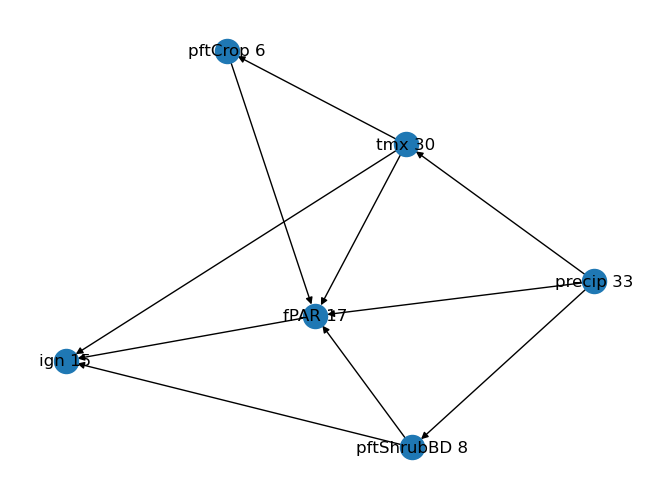

In [35]:

import matplotlib.pyplot as plt
nx_dag = nx.DiGraph(graph.edges())
nx.draw(nx_dag, with_labels=True)
plt.show()

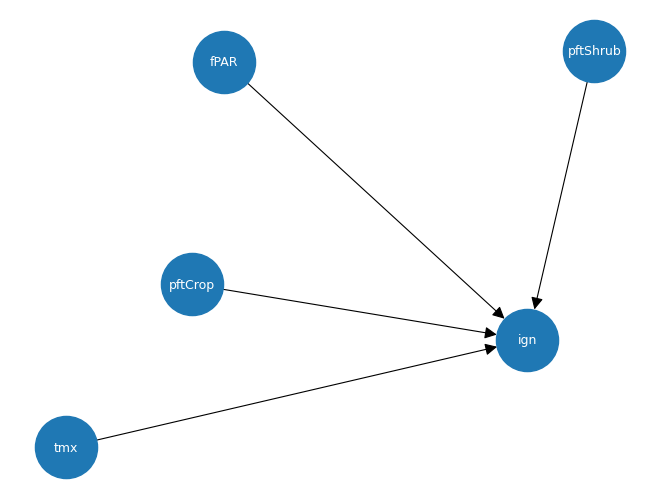

In [6]:
from pgmpy.base import DAG
graph = DAG()
graph.add_nodes_from(nodes = ['pftCrop', 'pftShrub', 'ign', 'fPAR', 'tmx',
    'precip 33'])
graph.add_edges_from(ebunch = [
        ('pftCrop','ign'),
        ('pftShrub','ign'),
        ('fPAR','ign'),
        ('tmx','ign')])
import matplotlib.pyplot as plt
import networkx as nx
nx_dag = nx.DiGraph(graph.edges())
options = {
    'node_size': 2000,
    'width': 0.8,
    'arrowstyle': '-|>',
    'arrowsize': 18,
    'font_color':'white',
    'font_size': 9
}
nx.draw(nx_dag, with_labels=True,**options)
plt.show()

In [26]:
import pandas as pd
df = pd.read_csv('../data/annual_df.csv')
df.head()

,pftCrop 6,pftShrubBD 8,ign 15,fPAR 17,tmx 30,precip 33
0,0.00037,0.014883,0.0,0.403727,13.000000,82.959999
1,0.00037,0.014883,0.0,0.606667,9.900001,45.029999
2,0.00037,0.014883,0.0,0.760000,11.000000,69.099998
3,0.00037,0.014883,0.0,0.000000,7.600000,97.120003
4,0.00037,0.014883,0.0,0.000000,6.500000,66.790001


In [27]:
june = pd.read_csv('../data/june.csv')
june.shape[0]

244243

In [28]:
season = df.iloc[june.shape[0]*4:june.shape[0]*8]
season.to_csv('../data/season.csv')